In [4]:
!pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --------------- ------------------------ 112.6/300.2 kB 2.2 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.7 MB/s eta 0:00:00


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string

In [3]:
import pandas as pd


filepath = "C:\\Users\\Ananya\\anaconda3\\Dissertation - UL\\Music-Generation-with-AI\\Project\\data\\One_Direction_all_albums.parquet"
lyrics_df = pd.read_parquet(filepath)


print(lyrics_df.head())


          artist                                album  \
0  One Direction  Up All Night _The Souvenir Edition_   
1  One Direction  Up All Night _The Souvenir Edition_   
2  One Direction  Up All Night _The Souvenir Edition_   
3  One Direction  Up All Night _The Souvenir Edition_   
4  One Direction  Up All Night _The Souvenir Edition_   

                    track_title  track_n  \
0  What Makes You Beautiful.txt        1   
1  What Makes You Beautiful.txt        1   
2  What Makes You Beautiful.txt        1   
3  What Makes You Beautiful.txt        1   
4  What Makes You Beautiful.txt        1   

                                               lyric  line  year  
0  134 ContributorsTranslationsEspañolPortuguêsFr...     1  2011  
1               You're insecure, don't know what for     2  2011  
2  You're turnin' heads when you walk through the...     3  2011  
3                Don't need makeup to cover up (Huh)     4  2011  
4               Bein' the way that you are is enough     

In [4]:

lyrics_df

,artist,album,track_title,track_n,lyric,line,year
0,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,134 ContributorsTranslationsEspañolPortuguêsFr...,1,2011
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011
...,...,...,...,...,...,...,...
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014
4135,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,60,2014
4136,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"When we were eighteen (Eighteen, yeah)",61,2014
4137,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,62,2014


In [6]:
lyrics_df.columns = ['Artist', 'Album', 'Track_title', 'Track_number', 'Lyric', 'Line', 'Year']
lyrics_df


,Artist,Album,Track_title,Track_number,Lyric,Line,Year
0,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,134 ContributorsTranslationsEspañolPortuguêsFr...,1,2011
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011
...,...,...,...,...,...,...,...
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014
4135,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,60,2014
4136,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"When we were eighteen (Eighteen, yeah)",61,2014
4137,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,62,2014


In [7]:
lyrics_df['Year'] = lyrics_df['Year'].astype('int')
lyrics_df

,Artist,Album,Track_title,Track_number,Lyric,Line,Year
0,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,134 ContributorsTranslationsEspañolPortuguêsFr...,1,2011
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011
...,...,...,...,...,...,...,...
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014
4135,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,60,2014
4136,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"When we were eighteen (Eighteen, yeah)",61,2014
4137,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,62,2014


In [9]:
lyrics_df.describe()

,Track_number,Line,Year
count,4139.000000,4139.000000,4139.000000
mean,9.272771,31.372312,2012.950713
std,5.301655,18.848851,1.428491
min,1.000000,1.000000,2011.000000
25%,5.000000,16.000000,2012.000000
50%,9.000000,30.000000,2013.000000
75%,14.000000,46.000000,2014.000000
max,20.000000,80.000000,2015.000000


In [10]:
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Artist        4139 non-null   object
 1   Album         4139 non-null   object
 2   Track_title   4139 non-null   object
 3   Track_number  4139 non-null   int64 
 4   Lyric         4139 non-null   object
 5   Line          4139 non-null   int64 
 6   Year          4139 non-null   int32 
dtypes: int32(1), int64(2), object(4)
memory usage: 210.3+ KB


In [11]:
#checking for null values
lyrics_df.isnull().sum()

Artist          0
Album           0
Track_title     0
Track_number    0
Lyric           0
Line            0
Year            0
dtype: int64

looking at the number of albums and songs

In [12]:
lyrics_df.columns

Index(['Artist', 'Album', 'Track_title', 'Track_number', 'Lyric', 'Line',
       'Year'],
      dtype='object')

In [13]:
info_album = lyrics_df.groupby(['Album', 'Year'])['Track_number'].nunique().reset_index()
info_album.rename(columns={'Track_number': 'number_of_tracks'}, inplace=True)
sorted_info_album = info_album.sort_values(by='Year')

sorted_info_album

,Album,Year,number_of_tracks
5,Up All Night _The Souvenir Edition_,2011,18
4,Take Me Home _Expanded Edition_,2012,20
3,Midnight Memories _The Ultimate Edition_,2013,18
0,FOUR _The Ultimate Edition_,2014,16
1,Made in the A.M. (Deluxe),2015,1
2,Made in the A.M. _Deluxe_,2015,17


it can be noticed that our lyrics contain capital letters and punctuation. So, we will be lowering the letters and removing punctuation 

In [24]:
#creating a translation table which maps punctuations to none
#with the exception of apostrophes
punct_except_apos = string.punctuation.replace("'","")
translate_table = str.maketrans("", "", punct_except_apos)

lyrics_df['Lyrics_clean'] = lyrics_df['Lyric'].str.lower()

#now applying the translation table to each lyrics
lyrics_df['Lyrics_clean'] = lyrics_df['Lyrics_clean'].apply(lambda x: x.translate(translate_table))



lyrics_df

,Artist,Album,Track_title,Track_number,Lyric,Line,Year,Lyrics_clean
0,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,134 ContributorsTranslationsEspañolPortuguêsFr...,1,2011,134 contributorstranslationsespañolportuguêsfr...
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011,you're insecure don't know what for
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011,you're turnin' heads when you walk through the...
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011,don't need makeup to cover up huh
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011,bein' the way that you are is enough
...,...,...,...,...,...,...,...,...
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014,when we were eighteen eighteen
4135,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,60,2014,i wanna love like you made me feel
4136,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"When we were eighteen (Eighteen, yeah)",61,2014,when we were eighteen eighteen yeah
4137,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,62,2014,i wanna love like you made me feel


we can see that there are some unwanted lines which are not part of the song lyrics 

In [25]:
print(lyrics_df['Lyrics_clean'][0])

134 contributorstranslationsespañolportuguêsfrançaisdeutschwhat makes you beautiful lyrics


so in order to remove such lines, we will be defining a function with regular expressions

In [26]:
import re

def clean_remove_lyrics(df, col_name):

    #regular expression that identifies unwanted lines which do not contain lyrics

    pattern = re.compile(r"^\d+|\b(Contributors|Translations|Lyrics|Español|Português|Français|Deutsch)\b", re.IGNORECASE)

    #to clean individual lyric entries
    def clean__text(text):
        lines = text.split('\n')
        clean_line = [line for line in lines if not pattern.search(line)]
        return '\n'.join(clean_line)
    
    df[col_name] = lyrics_df[col_name].apply(clean__text)
    
    return df


lyrics_df2 = clean_remove_lyrics(lyrics_df, 'Lyrics_clean')
lyrics_df2



,Artist,Album,Track_title,Track_number,Lyric,Line,Year,Lyrics_clean
0,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,134 ContributorsTranslationsEspañolPortuguêsFr...,1,2011,
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011,you're insecure don't know what for
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011,you're turnin' heads when you walk through the...
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011,don't need makeup to cover up huh
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011,bein' the way that you are is enough
...,...,...,...,...,...,...,...,...
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014,when we were eighteen eighteen
4135,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,60,2014,i wanna love like you made me feel
4136,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"When we were eighteen (Eighteen, yeah)",61,2014,when we were eighteen eighteen yeah
4137,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,62,2014,i wanna love like you made me feel


In [27]:
lyrics_df2.columns

Index(['Artist', 'Album', 'Track_title', 'Track_number', 'Lyric', 'Line',
       'Year', 'Lyrics_clean'],
      dtype='object')

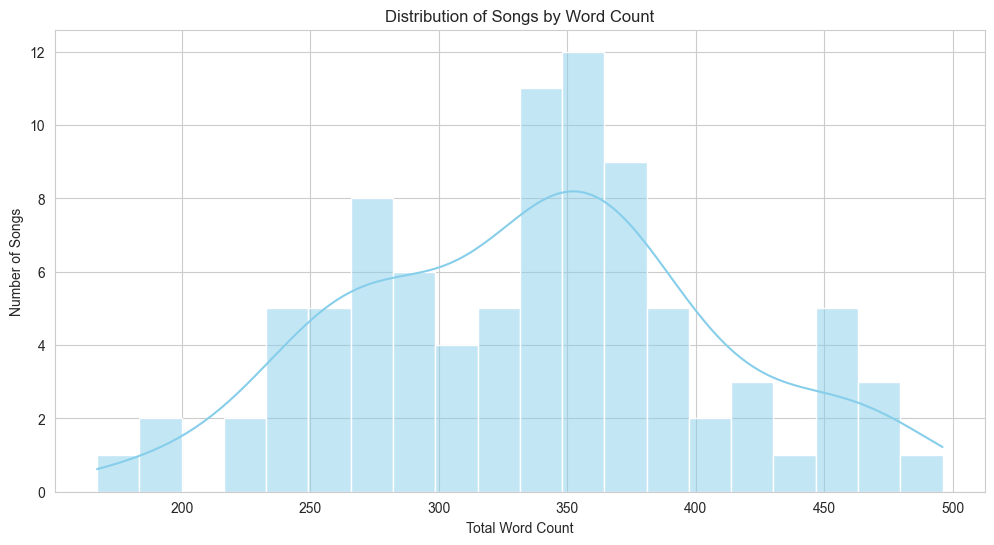

In [28]:
# Calculating word count distribution by song and creaating a column
lyrics_df2['word_count'] = lyrics_df2['Lyrics_clean'].apply(lambda x: len(x.split()) if x is not None else 0)

# Aggregating word count by song
word_ct_dist = lyrics_df2.groupby(['Album', 'Track_title'])['word_count'].sum().reset_index()

# Renaming columns for clarity
word_ct_dist.rename(columns={'word_count': 'total_word_count'}, inplace=True)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(word_ct_dist['total_word_count'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Songs by Word Count')
plt.xlabel('Total Word Count')
plt.ylabel('Number of Songs')
plt.show()

looking at how many duplicate rows we have and remove them. Usually, there is a tendency in songs to repeat phrases and I dont want to reinforce these words for my models

In [29]:
repetitive__rows = lyrics_df2['Lyrics_clean'].value_counts()
repetitive__rows = repetitive__rows[repetitive__rows > 1]

repetitive__rows

Lyrics_clean
                                                    90
you might also like                                 88
where do broken hearts go                           15
hey angel                                           14
you know i'll take you to another world             11
                                                    ..
and i wanna love like you made me feel               2
everyone else in the room can see it                 2
everyone else but you                                2
i wanna stay up all night and do it all with you     2
once in a lifetime it's just right                   2
Name: count, Length: 792, dtype: int64

In [30]:
# dropping all duplicates
lyricsdf_deduplicated = lyrics_df2.drop_duplicates(subset='Lyric')
lyricsdf_deduplicated.shape

(2520, 9)

In [31]:
lyricsdf_deduplicated.isnull().sum()

Artist          0
Album           0
Track_title     0
Track_number    0
Lyric           0
Line            0
Year            0
Lyrics_clean    0
word_count      0
dtype: int64

It can be seen that after cleaning the lyrics, the previous non-lyrical row is still there but with an empty space or white space

In [34]:
lyricsdf_deduplicated['Lyrics_clean'][0]

''

so creating a function that gives the count of all the rows that has such spaces and dropping them

In [36]:

def drop__emptylyrics(df, col_name):
    # Calculating the number of rows with empty lyrics (including only whitespace)
    empty_ct = df[col_name].str.strip().eq('').sum()
    print(f"Number of rows with empty '{col_name}': {empty_ct}")
    
    # Dropping the rows where the lyrics column is either empty or contains only whitespace
    df = df[df[col_name].str.strip().ne('')]
    
    return df


cleaned_lyrics_df_deduplicated = drop__emptylyrics(lyricsdf_deduplicated, 'Lyrics_clean')


cleaned_lyrics_df_deduplicated.head()


Number of rows with empty 'Lyrics_clean': 90


,Artist,Album,Track_title,Track_number,Lyric,Line,Year,Lyrics_clean,word_count
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011,you're insecure don't know what for,6
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011,you're turnin' heads when you walk through the...,9
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011,don't need makeup to cover up huh,7
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011,bein' the way that you are is enough,8
5,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Everyone else in the room can see it,8,2011,everyone else in the room can see it,8


In [37]:
cleaned_lyrics_df_deduplicated

,Artist,Album,Track_title,Track_number,Lyric,Line,Year,Lyrics_clean,word_count
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011,you're insecure don't know what for,6
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011,you're turnin' heads when you walk through the...,9
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011,don't need makeup to cover up huh,7
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011,bein' the way that you are is enough,8
5,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Everyone else in the room can see it,8,2011,everyone else in the room can see it,8
...,...,...,...,...,...,...,...,...,...
4121,One Direction,FOUR _The Ultimate Edition_,18.txt,16,And I wanna love like you made me feel,37,2014,and i wanna love like you made me feel,9
4124,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"Oh, lord",42,2014,oh lord,2
4126,One Direction,FOUR _The Ultimate Edition_,18.txt,16,Kiss me where I lay down,46,2014,kiss me where i lay down,6
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014,when we were eighteen eighteen,5
